<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/random_forest__breast_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

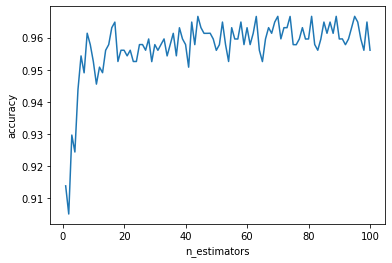

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


cancer_data = load_breast_cancer() # instantiate breast cancer dataset as 'cancer_data'
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names']) # create DataFrame 'df' from 'cancer_data', passing 'data'  as the data, 'feature_names' as the column labels
df['target'] = cancer_data['target'] # create new column 'target' in 'df', passing 'target' values from 'cancer_data'

# features and target selection
X = df[cancer_data.feature_names].values # select the features by passing 'feature_names' from 'cancer_data'
y = df['target'].values # select the target

# Increasing number of trees in the forest ('n_estimators') will never hurt performance: it will increase performance and then level out. 
# However, it will add complexity which is more resource intensive. 
# We look for the sweet spot: minimum number of trees that optimizes performance without adding unnecssary complexity. For this we use an elbow graph.

# let's do grid search trying all the values from 1 to 100 trees in the forest
rf = RandomForestClassifier() # instantiate random forest model
n_trees = list(range(1, 101))
param_grid = {'n_estimators': n_trees,}  # list of hyperparameters we want to tune and values we want to try for each one. (These are parameters for 'RandomForestClassifier()'
gs = GridSearchCV(rf, param_grid, cv=5) # instantiate grid search object. pass random forest model, 'param_grid', 'cv=5' number of folds for kfold cross validation
gs.fit(X, y) # fit grid search with features and targets. Grid search will build models for every possible combination of parameters. 100 'n_estimators' values = 100 models
scores = gs.cv_results_['mean_test_score'] # 'cv_results_' is a dictionary holding lots of data, key 'mean_test_score' holds cross-validated score for each model. assign to variable 'scores'

# plot results with matplotlib
plt.plot(n_trees, scores) # pass 'n_trees' to x-axis, 'scores' to y-axis
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

# If we look at this graph, we see that around 10 trees the graph levels out. 
# The best models occur later, but given how volatile it is, that was probably due to random chance. 
# We should choose about 10 to be our number of estimators, because we want the minimum number of estimators that still yield maximum performance.

# Now we can build our random forest model with the optimal number of trees.
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y) 

# You’ll see elbow graphs pop up in lots of different situations when we are adding complexity to a model 
# and want to determine the minimal amount of complexity that will yield optimal performance.

# code and comments by github.com/alandavidgrunberg
